# Master Thesis


In [75]:
from utils import *
from network import *
import pandas as pd
import json
%load_ext autoreload
%autoreload 2
net = Network()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
def get_results(centrality) : 
    artists_dict = dict()
    for row in results : 
        for art in row['artists'] :
            for c in  centrality:
                if art['name'] == c :
                    if art['name'] not in artists_dict.keys() :
                        artists_dict[art['name']] = set()
                    for r in art['role']:
                        artists_dict[art['name']].add(r)
                    break    
    return artists_dict

# Bipartite Graph

In [ ]:
results = None
with open('../data/albums/jazz/album-final.json',encoding="UTF-8") as f:
        results = json.load(f)   

In [4]:
bipartite_jazz_net =  net.build_bipartite_network(results,'title','artists','year')

In [ ]:
centralities = net.get_bipartite_degree_centrality(bipartite_jazz_net)

In [95]:
names  = centralities

In [73]:
names  = centralities
idx =1
for n in names :
    print(idx,"-",n,"-",get_results(centralities)[n])
    idx+=1

1 - rudy van gelder - {'mixed', 'mastered', 'engineer', 'lacquer cut', 'recorded', 'remastered'}
2 - manfred eicher - {'liner notes', 'mixed', 'mastered', 'producer', 'executive producer', 'supervised', 'co producer', 'engineer', 'technician', 'edited'}
3 - francis wolff - {'design', 'photography', 'producer', 'cover'}
4 - reid miles - {'cover', 'artwork', 'art direction', 'design', 'photography'}
5 - alfred lion - {'producer'}
6 - nat hentoff - {'supervised', 'liner notes', 'producer', 'sleeve notes'}
7 - jan erik kongshaug - {'mixed', 'mastered', 'field recording', 'engineer', 'edited', 'recorded'}
8 - ron carter - {'main artist', 'recorder', 'double bass', 'producer', 'soloist', 'composed', 'conductor', 'strings', 'written', 'arranged', 'cello', 'piccolo'}
9 - creed taylor - {'producer'}
10 - herbie hancock - {'main artist', 'organ', 'harp', 'drum programming', 'drum machine', 'conductor', 'written', 'featuring', 'producer', 'piano', 'performer', 'guest', 'percussion', 'arranged', '

In [8]:
len(get_results(centralities).keys())

14

# jazz Album projection network 

In [5]:
albums = [x for x,y in bipartite_jazz_net.nodes(data=True) if y['type']=='Album']
jazz_album_projection_network = nx.projected_graph(bipartite_jazz_net, albums, multigraph=False)
#jazz_album_projection_network = net.build_album_projection_network(albums,'title','artists','year')
net.get_network_info(jazz_album_projection_network)

nb nodes:  4741
nb edges:  369779
Min node degree:  0
Max node degree:  941
Avg node degree:  155.99198481333053


In [13]:
largest_cc = max(nx.connected_components(jazz_album_projection_network), key=len)
largest_cc = jazz_album_projection_network.subgraph(largest_cc)
net.get_avg_path_length(largest_cc)

get_avg_path_length:  2.8330139350781245


In [25]:
net.get_diameter(largest_cc)
net.get_density(jazz_album_projection_network)
net.get_nb_of_connected_comp(jazz_album_projection_network)
net.get_avg_weighted_degree(jazz_album_projection_network)
net.get_avg_clustering_coefficent(jazz_album_projection_network)

Diameter :  11
Density :  0.0329097014374115
Nb connected components :  208
Avg weighted degree :  2476025.6645222525
Average clustering coefficient :  0.5362826376872663


## clustering coefficient

In [22]:
nb_solo = 0
for r in results : 
    if len(r['artists']) <= 3 :
        nb_solo+=1
nb_solo        

337

69


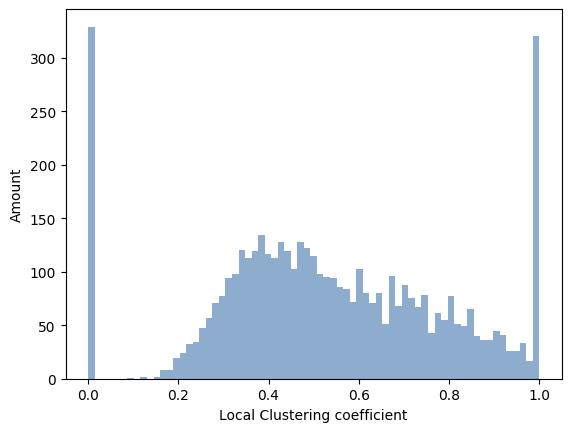

In [16]:
net.plot_hist_clustering_coeff_by_amount(jazz_album_projection_network)

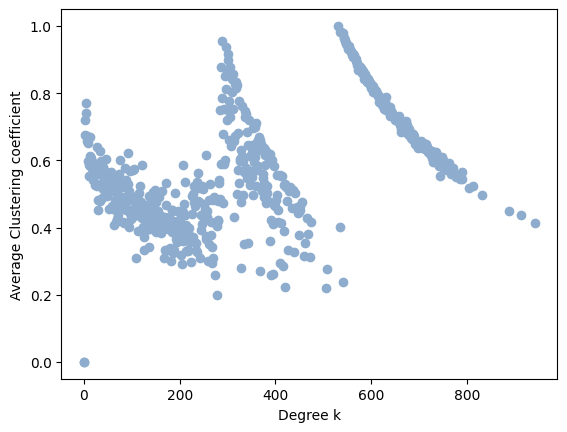

In [23]:
net.plot_clustering_coeff_by_degree(jazz_album_projection_network)

In [108]:
net.save_graph(jazz_album_projection_network,"../networks/gephi/jazz_album_projection_network.gexf")

# Jazz collaborators network 

In [7]:
collaborators = [x for x,y in bipartite_jazz_net.nodes(data=True) if y['type']=='Artist']
collaborators_projection_network = nx.projected_graph(bipartite_jazz_net, collaborators, multigraph=False) 
net.save_graph(collaborators_projection_network,"../networks/gephi/jazz_collaborators_projection.gexf")

## General Network  info

In [15]:
largest_cc = max(nx.connected_components(collaborators_projection_network), key=len)
largest_cc = collaborators_projection_network.subgraph(largest_cc)

In [20]:
net.get_network_info(collaborators_projection_network)      
net.get_diameter(largest_cc)
net.get_density(collaborators_projection_network)
net.get_nb_of_connected_comp(collaborators_projection_network)
net.get_avg_weighted_degree(collaborators_projection_network)
net.get_avg_clustering_coefficent(collaborators_projection_network)
net.get_avg_path_length(largest_cc)

Diameter :  12
Density :  0.0014801664464818677
Nb connected components :  208
Avg weighted degree :  3166474822.5064344
Average clustering coefficient :  0.8453609697036518


In [ ]:
top50musicians = sorted(collaborators_projection_network.degree, key=lambda x: x[1], reverse=True)
top50musicians

## Local Clustering coefficient

153


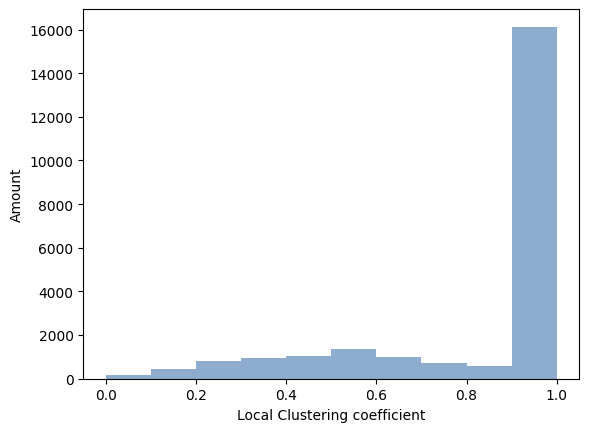

In [43]:
net.plot_hist_clustering_coeff_by_amount(collaborators_projection_network)

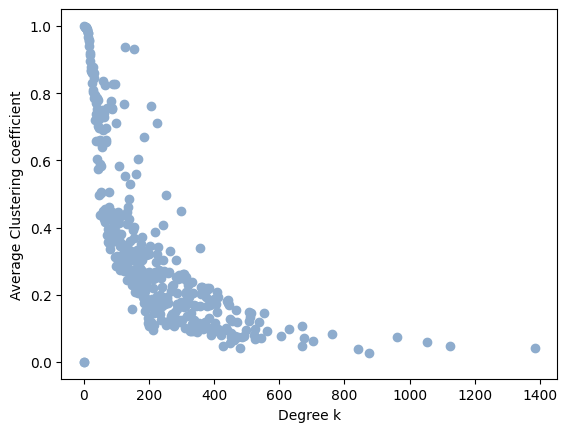

In [37]:
net.plot_clustering_coeff_by_degree(collaborators_projection_network)

## Centralities Analysis

### Degree centralities

In [106]:
top_artists_names = net.get_degree_centrality(collaborators_projection_network)[0]
idx = 1
for n in top_artists_names :
    print(idx,"-",n,"-",get_results(top_artists_names)[n])
    idx+=1

### Eigenvector centralities

In [ ]:
top_artists_names = net.get_eigenvector_centrality(collaborators_projection_network)[0]
idx = 1
for n in top_artists_names :
    print(idx,"-",n,"-",get_results(top_artists_names)[n])
    idx+=1

### Betweenness centrality

In [ ]:
top_artists_names = net.get_betweenness_centrality(collaborators_projection_network)[0]
idx = 1
for n in top_artists_names :
    print(idx,"-",n,"-",get_results(top_artists_names)[n])
    idx+=1

### Correlation between the centralities 

In [9]:
names = net.get_spearman_corr(collaborators_projection_network)

Spearman corr between projected degree k and betweenness centrality SignificanceResult(statistic=0.9988715437443674, pvalue=2.8063564772254223e-25)
Spearman corr between projected degree k and eigenvector centrality is  SignificanceResult(statistic=0.950163493671981, pvalue=1.502221594959727e-10)
Spearman corr between betweenness centrality and eigenvector centrality SignificanceResult(statistic=0.950163493671981, pvalue=1.502221594959727e-10)


In [40]:
artists_dict = dict()
artist_set = set()
for c in names:
   artist_set.add(collaborators_projection_network.nodes[c]['name'])
artist_set

{'al schmitt',
 'bernie grundman',
 'bill frisell',
 'bob ludwig',
 'chick corea',
 'dave holland',
 'david baker',
 'evan parker',
 'greg calbi',
 'herbie hancock',
 'hermeto pascoal',
 'jack dejohnette',
 'jan erik kongshaug',
 'kenny wheeler',
 'manfred eicher',
 'martin s. gold',
 'ron carter',
 'rudy van gelder',
 'scott hull',
 'wayne shorter'}

# All Time album Network

In [4]:
albums = None
with open('../data/albums/all_time_album-final.json',encoding="UTF-8") as f:
        albums = json.load(f)   

In [33]:
album_projection_network = net.build_album_projection_network(albums,'title','artists')
net.get_network_info(album_projection_network)

nb nodes:  3971
nb edges:  46696
Min node degree:  0
Max node degree:  200
Avg node degree:  23.518509191639385


In [34]:
net.save_graph(album_projection_network,"../networks/gephi/all_time_album_projection.gexf")

In [30]:
collaborators_projection_network = net.build_collaborators_projection_network(albums,'artists')
net.get_network_info(collaborators_projection_network)     

nb nodes:  27406
nb edges:  37354
Min node degree:  1
Max node degree:  153
Avg node degree:  2.725972414799679


In [31]:
net.save_graph(collaborators_projection_network,"../networks/gephi/all_time_collaborators_projection.gexf")

# Montreux

In [42]:
mjf = None
with open('../data/mjf/mfj_export_clean-final.json',encoding="UTF-8") as f:
        mjf = json.load(f)      
results = mjf

In [16]:
def get_results(centrality) : 
    artists_dict = dict()
    for row in results : 
        for art in row['musicians'] :
            for c in  centrality:
                if art['name'] == c :
                    if art['name'] not in artists_dict.keys() :
                        artists_dict[art['name']] = set()
                   
                    for r in row['categories']:
                        artists_dict[art['name']].add(r)
                    break    
    return artists_dict

## Bipartite Graph

In [76]:
bipartite_mjf_net = net.build_bipartite_network(results,'name','musicians','date','categories')

In [72]:
centralities = net.get_bipartite_degree_centrality(bipartite_mjf_net)

74
56
43
32
28
26
26
25
24
23
23
23
23
23
22
21
21
21
20
20


In [ ]:
names = centralities
idx =1
for n in names[0] :
    print(idx,"-",n,"-",get_results(centralities[0])[n])
    idx+=1

## Events Network

In [107]:
#mjf_event_net = net.build_album_projection_network(results,'name','musicians','date')
albums = [x for x,y in bipartite_mjf_net.nodes(data=True) if y['type']=='Album']
mjf_event_net = nx.projected_graph(bipartite_mjf_net, albums, multigraph=False)
net.get_network_info(mjf_event_net)


nb nodes:  4280
nb edges:  22057
Min node degree:  0
Max node degree:  306
Avg node degree:  10.307009345794393


In [111]:
largest_cc = max(nx.connected_components(mjf_event_net), key=len)
largest_cc = mjf_event_net.subgraph(largest_cc)
print("nb nodes :", len(largest_cc))
print("percentage of nodes in the giant component: ",(len(largest_cc) *100)/len(mjf_event_net),"%")

nb nodes : 2875
percentage of nodes in the giant component:  67.17289719626169 %


In [ ]:
largest_cc = max(nx.connected_components(mjf_event_net), key=len)
largest_cc = mjf_event_net.subgraph(largest_cc)
net.get_diameter(largest_cc)
net.get_density(mjf_event_net)
net.get_nb_of_connected_comp(mjf_event_net)
#net.get_avg_weighted_degree(mjf_event_net)
net.get_avg_clustering_coefficent(mjf_event_net)

In [22]:
net.save_graph(mjf_event_net,"../networks/gephi/mjf_event_graph.gexf")

## Collaboration network 

In [77]:
collaborators = [x for x,y in bipartite_mjf_net.nodes(data=True) if y['type']=='Artist']
mjf_collaboration_net = nx.projected_graph(bipartite_mjf_net, collaborators, multigraph=False)
net.get_network_info(mjf_collaboration_net)


nb nodes:  17639
nb edges:  108230
Min node degree:  0
Max node degree:  550
Avg node degree:  12.271670729633199


In [46]:
largest_cc = max(nx.connected_components(mjf_collaboration_net), key=len)
largest_cc = mjf_collaboration_net.subgraph(largest_cc)
len(largest_cc)

11727

In [47]:
#percentage of nodes in the giant component :
print("percentage of nodes in the giant component: ",(len(largest_cc) *100)/len(mjf_collaboration_net),"%")

percentage of nodes in the giant component:  66.48336073473553 %


In [ ]:
largest_cc = max(nx.connected_components(mjf_collaboration_net), key=len)
largest_cc = mjf_collaboration_net.subgraph(largest_cc)
net.get_diameter(largest_cc)
net.get_density(mjf_collaboration_net)
net.get_nb_of_connected_comp(mjf_collaboration_net)
net.get_avg_weighted_degree(mjf_collaboration_net)
net.get_avg_clustering_coefficent(mjf_collaboration_net)

In [26]:
net.save_graph(mjf_collaboration_net,"../networks/gephi/mjf_collaboration_network.gexf")

In [26]:
def get_results(centrality) : 
    artists_dict = dict()
    for row in results : 
        for art in row['musicians'] :
            for c in centrality:
                if art['id'] == int(str(c)[3:]) :
                    if art['name'] not in artists_dict.keys() :
                        artists_dict[art['id']] = set()
                   
                    for r in row['categories']:
                        artists_dict[art['id']].add(r)
                    break    
    return artists_dict

In [ ]:
centralities = net.get_degree_centrality(mjf_collaboration_net)
names = centralities
idx = 1
for n in names[0] :
    print(idx,"-",int(str(n)[3:]),"-",get_results(centralities[0])[int(str(n)[3:])])
    idx+=1

## Meta-Network genres

In [36]:
df = pd.read_csv("../data/genres/musician_genre.csv",sep=';')
df["genres"] = df["genres"].apply(lambda x : str(x).split(","))


In [11]:
df.head()

,id,genres
0,30407,[World Music]
1,9124,"[World Music, Electronic/Dance]"
2,30423,[World Music]
3,30421,[World Music]
4,30420,[World Music]


In [46]:
cat = None
with open("../data/genres/genres_cat.json",encoding="utf-8") as f:
            cat = json.load(f)  

In [ ]:
#if M1 and M2 collabored together multiple time weigth of edge increases, so what to do? count once the collaboration or leave it 
treated = set()
meta_net_genres = nx.Graph()
treated_node_weight = set()

for cate in cat['categories']:
    meta_net_genres.add_node(cate['category'],weight=0)

for n,d in mjf_collaboration_net.nodes(data=True):
    treated.add(int(str(n)[3:]))  
    musician_in = df[df['id'] == int(str(n)[3:])]   
    for g in musician_in['genres'].squeeze(): 
        meta_net_genres.nodes[g]['weight'] += 1 
         
    for neighbor in mjf_collaboration_net.neighbors(n):
        if int(str(neighbor)[3:]) not in treated :
            musician_out = df[df['id'] == int(str(neighbor)[3:])] 
            
            for g_in in musician_out['genres'].squeeze():
                for g2 in musician_in['genres'].squeeze():   
                    if g_in >= g2 : 
                        continue      
                    if not meta_net_genres.has_edge(g_in,g2) :                     
                        meta_net_genres.add_edge(g_in, g2,weight = 1)   
                    else :
                        meta_net_genres[g_in][g2]['weight'] += 1      
                                 

In [46]:
net.save_graph(meta_net_genres,"../networks/gephi/meta_net_genres_final.gexf")

### Meta network of jazz subgenres

In [53]:
normalized_dict = pd.json_normalize(cat['categories'], sep=',')
jazz_subgenres = list(normalized_dict[(normalized_dict['category']=='Jazz')]['genres'])[0]

In [54]:
jazz_subgenres_clean =list()
for g in jazz_subgenres :
    jazz_subgenres_clean.append(g.lower())

In [55]:
df = pd.read_csv("../data/genres/musician_jazz_sub_genre.csv",sep=';')
df["genres"] = df["genres"].apply(lambda x : str(x).split(","))

In [56]:
#if M1 and M2 collabored together multiple time weigth of edge increases, so what to do? count once the collaboration or leave it 
treated = set()
meta_net_genres = nx.Graph()
treated_node_weight = set()

for cate in jazz_subgenres_clean:
    meta_net_genres.add_node(cate,weight=0)

for n,d in mjf_collaboration_net.nodes(data=True):
    treated.add(int(str(n)[3:]))  
    musician_in = df[df['id'] == int(str(n)[3:])]   
    musician_in_genre  = musician_in['genres'].squeeze()
  
    if  len(musician_in_genre) != 0 and str(musician_in_genre[0]) != 'nan':
    
        for g in musician_in_genre: 
             meta_net_genres.nodes[g]['weight'] += 1 
         
        for neighbor in mjf_collaboration_net.neighbors(n):
             if int(str(neighbor)[3:]) not in treated :
                musician_out = df[df['id'] == int(str(neighbor)[3:])] 
                musician_out_genre = musician_out['genres'].squeeze()
                if len(musician_out_genre)!=0 and str(musician_out_genre[0])!= 'nan':
                    for g_in in musician_out_genre:
                        for g2 in musician_in_genre:   
                            if g_in >= g2 : 
                                continue      
                            if not meta_net_genres.has_edge(g_in,g2) :                     
                                meta_net_genres.add_edge(g_in, g2,weight = 1)   
                            else :
                                meta_net_genres[g_in][g2]['weight'] += 1      
                                 

In [57]:
net.save_graph(meta_net_genres,"../networks/gephi/meta_net_jazz_subgenres.gexf")

## Role specific network

In [78]:
instruments = pd.read_csv("../data/instruments/mjf_instruments.csv",sep=",")
instruments.head()

,name
0,ableton
1,accordion
2,acoustic drums
3,ad
4,agogo


In [79]:
cnames=['instrument','nb_nodes' ,'size_of_the_GC', 'fraction_of_omitted_edges']
df = pd.DataFrame(columns=cnames)

In [89]:
for instru in instruments['name']:

    role_specific_network = net.build_role_specific_network(results,'name','musicians','date','categories',instru)
    collaborators = [x for x,y in role_specific_network.nodes(data=True) if y['type']=='Artist']
    role_specific_network = nx.projected_graph(role_specific_network, collaborators, multigraph=False)
    largest_cc = max(nx.connected_components(role_specific_network), key=len)
    largest_cc = role_specific_network.subgraph(largest_cc)
    
    nb_nodes = len(largest_cc)
    per_size_of_GC = (len(largest_cc) *100)/len(mjf_collaboration_net)
    per_ommited_eges = 100 - (len(role_specific_network.edges)*100)/len(mjf_collaboration_net.edges)
    df.loc[-1]  = [instru,nb_nodes,per_size_of_GC,per_ommited_eges]
    df.index = df.index + 1
    #print("Number of nodes in the giant component",len(largest_cc))
    #print("percentage of nodes in the giant component: ",(len(largest_cc) *100)/len(mjf_collaboration_net),"%")
    #print("Fraction of ommited edges:",100 - (len(role_specific_network.edges)*100)/len(mjf_collaboration_net.edges),"%")


In [ ]:
df = df.sort_index() 
df = df.sort_values('size_of_the_GC')

In [102]:
#Social network
df.iloc[0:10,:]

,instrument,nb_nodes,size_of_the_GC,fraction_of_omitted_edges
9,vocals,8758,49.651341,29.337522
146,guitar,9400,53.291003,20.464751
181,drums,9775,55.416974,17.463735
71,recorder,9818,55.660752,19.276541
124,keyboards,10404,58.982936,13.490714
63,saxophone,10665,60.462611,13.186732
79,percussions,10750,60.944498,9.597154
78,piano,10864,61.590793,6.969417
22,trumpet,10867,61.607801,11.993902
23,trombone,11178,63.370939,7.614340


In [ ]:
cnames=['instrument','nb_nodes' ,'size_of_the_GC', 'fraction_of_omitted_edges']
df2 = pd.DataFrame(columns=cnames)
for instru in instruments['name']:

    role_specific_network = net.build_role_specific_network(results,'name','musicians','date','categories',instru)
    albums = [x for x,y in bipartite_mjf_net.nodes(data=True) if y['type']=='Album']
    role_specific_network = nx.projected_graph(role_specific_network, albums, multigraph=False)
    largest_cc = max(nx.connected_components(role_specific_network), key=len)
    largest_cc = role_specific_network.subgraph(largest_cc)
    
    nb_nodes = len(largest_cc)
    per_size_of_GC = (len(largest_cc) *100)/len(mjf_event_net)
    per_ommited_eges = 100 - (len(role_specific_network.edges)*100)/len(mjf_event_net.edges)
    df2.loc[-1]  = [instru,nb_nodes,per_size_of_GC,per_ommited_eges]
    df2.index = df2.index + 1
    #print("Number of nodes in the giant component",len(largest_cc))
    #print("percentage of nodes in the giant component: ",(len(largest_cc) *100)/len(mjf_collaboration_net),"%")
    #print("Fraction of ommited edges:",100 - (len(role_specific_network.edges)*100)/len(mjf_collaboration_net.edges),"%")
df2 = df2.sort_index() 
df2 = df2.sort_values('size_of_the_GC')    
df2

In [109]:
df2.iloc[0:10,:]

,instrument,nb_nodes,size_of_the_GC,fraction_of_omitted_edges
9,vocals,2454,57.336449,20.088861
146,guitar,2558,59.766355,14.367321
181,drums,2703,63.154206,8.500703
78,piano,2709,63.294393,17.296096
71,recorder,2729,63.761682,9.022079
124,keyboards,2756,64.392523,12.485832
63,saxophone,2796,65.327103,7.163259
79,percussions,2801,65.443925,3.096523
22,trumpet,2819,65.864486,3.599764
138,harmonica,2828,66.074766,12.975473
